本教程复现论文Variational Quantum Linear Solver中的图四。图四使用了文中提出的VQLS算法求解文中II.B.1中给出的问题Ising-inspired QLSP，给出了参数$\kappa$与线路运行次数的关系。

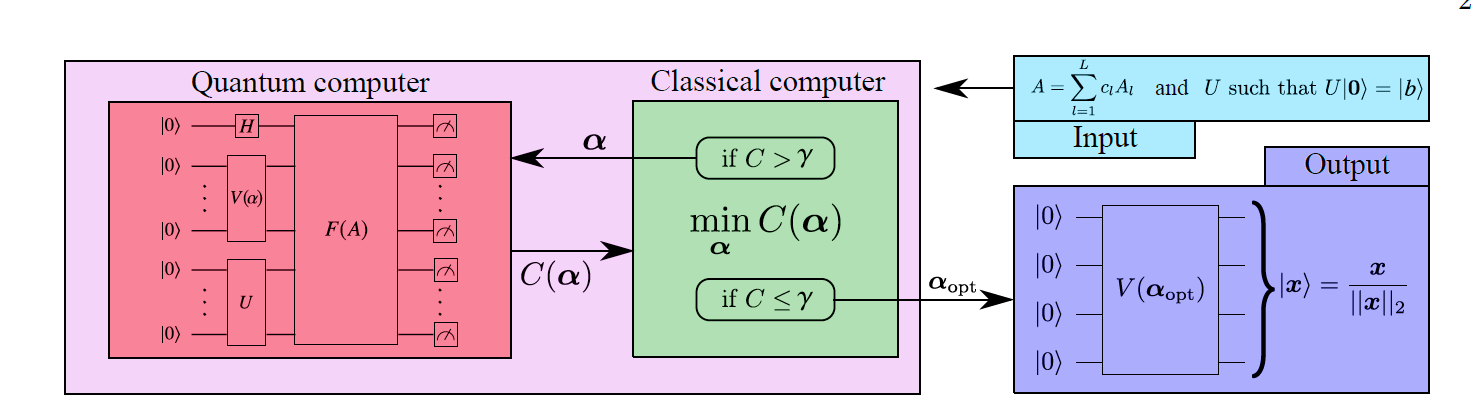

VQLS算法用于求解线性方程的解，即对方程$Ax=b$，已知$A$和$b$，得出方程的解$x$。如上图所示，在VQLS算法中，作者利用量子线路来代替$A$，使用含参量子线路$V(\alpha)$来制备$x$，即$|x\rangle=V(\alpha)|0\rangle$，使用量子线路$U$来制备$b$，即$U|0\rangle=|b\rangle$，通过对$V(\alpha)$中的参数$\alpha$进行优化，使得$AV|0\rangle=A|x\rangle$逼近$U|0\rangle=|b\rangle$，从而得到方程的解$x$。

# 损失函数的导出

文中使用了量子网络得到损失函数的值，并根据损失函数的值对量子网络的参数$\alpha$进行优化。下面对文中的损失函数进行简要说明。

## 损失函数值的形式

文中通过Ansatz线路生成$|x(\alpha)\rangle$，将$|\psi\rangle=A|x\rangle$逼近$|b\rangle$来得到参数$\alpha$。

因此损失函数定义为$C_G=1-|\langle b|\psi\rangle|^2=1-\langle\psi|b\rangle\langle b|\psi\rangle=1-\langle x|A^+U|\mathbf0\rangle\langle\mathbf0|U^+A|\psi\rangle$. 

但是$C_G$在优化时容易遇到barren plateaus。

因此引入了新的损失函数
$C_L=1-\langle x|A^+U(\frac{1}{n}\sum_{j=1}^n|0_j\rangle\langle0_j|\bigotimes\Bbb1_{\overline j})U^+A|x\rangle$

代入$|0_j\rangle\langle0_j|=\frac{Z_j+I_j}{2}$

即
$$C_L=\frac{1}{2}-\frac{1}{2n}\sum_{j=1}^n\langle x|A^+UZ_jU^+A|x\rangle$$

其中$A$可以分解成一系列幺正矩阵之和$A=\sum_{l=1}^Lc_lA_l$，其中$A_l$对应了简单的门电路，方便使用Hadamard Test求解。于是$C_L$可以分解为

$$C_L=\frac{1}{2}-\frac{1}{2n}\sum_{ll'j}c_lc_{l'}\langle x|A^+_{l'}UZ_jU^+A_l|x\rangle$$

## Hadamard Test线路计算损失函数

文中提供了Hadamard Test线路和Hadamard Overlap Test线路计算上面提到的损失函数$C_L$。这里使用Hadamard Test线路进行计算，文中的Fig. 9(c)为对应的线路图。

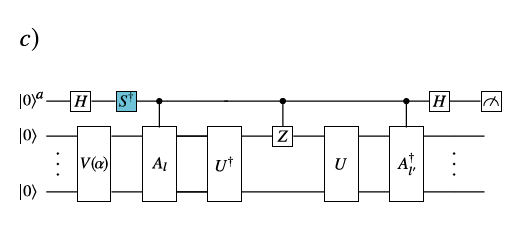

对于中间的受控$Z_j$，由于需要作用到每一个比特上，那么线路将多生成$n_{qubits}$个，我们可以使用受控PS门来代替受控$Z_j$，将PS门的参数以encoding的形式传入到量子网络中。首先我们在$Z_j$的位置对所有比特都施加一个受控PS门，当想要对第$j$个比特实现$Z_j$作用时，我们将作用在第$j$个比特的$PS$门中传入参数$\pi$，这样受控$PS_j$门会变成$Z_j$，对于其他所有比特的$PS_{\overline j}$门传入参数0，那么其他比特的的$PS$门会变成单位矩阵$I_\overline j$，即可实现想要的效果。

### 推导

下面简要推导从Hadamard Test得到$C_L$的过程。

系统初态为$|\mathbf0\rangle=|0\rangle_a\bigotimes|0\rangle^{\bigotimes n}$，经过H门作用，系统变为$\frac{1}{\sqrt2}|0\rangle_a\bigotimes|0\rangle^{\bigotimes n} + \frac{1}{\sqrt2}|1\rangle_a\bigotimes|0\rangle^{\bigotimes n}$。

经过各种门电路作用，系统的态最终变成了

$$|\phi\rangle=\frac{1}{\sqrt2}H|0\rangle_a\bigotimes V|0\rangle^{\bigotimes n} -j \frac{1}{\sqrt2}H|1\rangle_a\bigotimes A_{l'}^+UZ_jU^+A_lV|0\rangle^{\bigotimes n}=\frac{1}{2}(|0\rangle_a+|1\rangle_a)\bigotimes V|0\rangle^{\bigotimes n} -j \frac{1}{2}(|0\rangle_a-|1\rangle_a)\bigotimes A_{l'}^+UZ_jU^+A_lV|0\rangle^{\bigotimes n}
$$

线路最后对ancilla比特进行了测量，得到0的概率为

$$P(|0\rangle_a)=\langle\phi|(|0\rangle_a\langle0|_a\bigotimes I)|\phi\rangle
=\frac{1}{4}\langle0|^{\bigotimes n}(V^++jV^+A_l^+UZ_j^+U^+A_{l'})(V-jA_{l'}^+UZ_jU^+A_lV)|0\rangle^{\bigotimes n}
=\frac{1}{2}-j\langle x|A^+_{l'}UZ_jU^+A_l|x\rangle+j\langle x|A^+_lUZ^+jU^+A_{l'}|x\rangle
=\frac{1}{2}+\frac{1}{2}Im[\langle x|A^+_{l'}UZ_jU^+A_l|x\rangle]$$

同理可得，得到1的概率为

$$P(|1\rangle_a)
=\frac{1}{2}-\frac{1}{2}Im[\langle x|A^+_{l'}UZ_jU^+A_l|x\rangle]$$

因此$C_L$中$\langle x|A^+_{l'}UZ_jU^+A_l|x\rangle$的虚部可由$P(|0\rangle_a)-P(|1\rangle_a)$得到，如要求实部将线路中$S^+$去掉，同样使用$P(|0\rangle_a)-P(|1\rangle_a)$得到。

$$P(|0\rangle_a)-P(|1\rangle_a)
=\langle\phi|(|0\rangle_a\langle0|_a\bigotimes I)|\phi\rangle-\langle\phi|(|1\rangle_a\langle1|_a\bigotimes I)|\phi\rangle
=\langle\phi|(Z_a\bigotimes I)|\phi\rangle$$

在Mindquantum中要求$P(|0\rangle_a)-P(|1\rangle_a)$的值，只需要使用量子线路生成$|\phi\rangle$后，再求哈密顿量$Z_a$在$|\phi\rangle$上的期望即可。


# VQLS算法实例

本教程使用MindQuantum首先复现https://pennylane.ai/qml/demos/tutorial_vqls.html 中的一个简单算例，详细说明VQLS的运行过程。

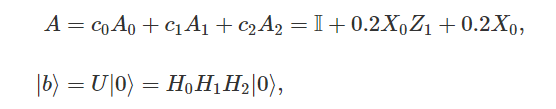
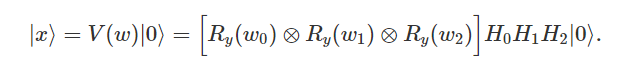

## 网络结构

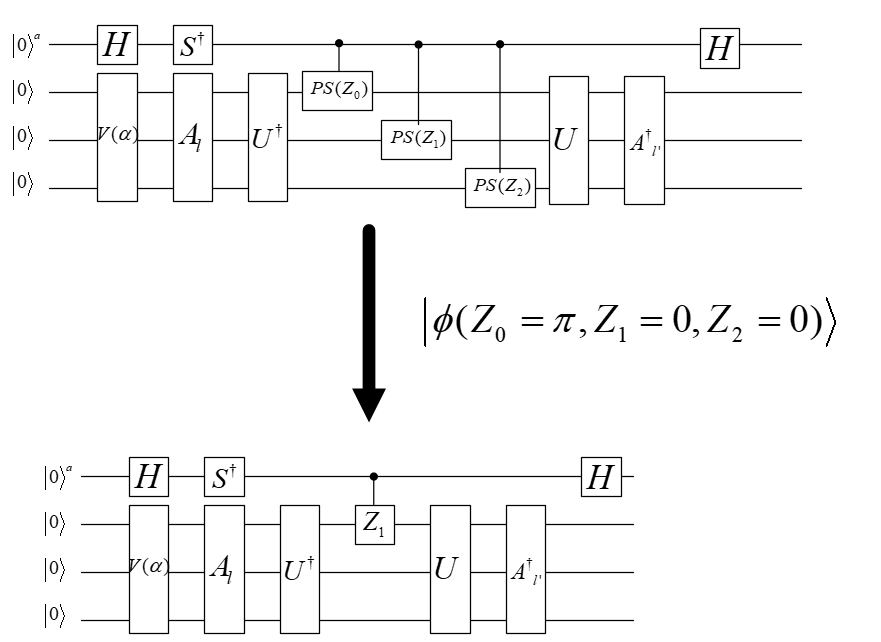

为了得到
$$C_L=\frac{1}{2}-\frac{1}{2n}\sum_{ll'j}c_lc_{l'}\langle x|A^+_{l'}UZ_jU^+A_l|x\rangle$$

其中的
$$Im[\langle x|A^+_{l'}UZ_jU^+A_l|x\rangle]=\langle\phi(ll'j)||0\rangle_a\langle  0|_a|\phi(ll'j)\rangle$$

对于$l,l'$不同的取值，每个都要生成两个网络，用于计算实部和虚部，$j$可以通过对PS门传参控制。

本教程中，先构造网络生成$|\phi(ll'j)\rangle$,通过对其求期望的方式构造梯度算子，从而得到了各个量子网络的输出，再使用$c_lc_{l'}$加权叠加，计算得到$C_L$，并使用Mindspore中的自动微分功能，对$C_L$自动求导并优化。

## 构造$A, U, V$线路

In [1]:
from mindquantum.core.circuit import Circuit, UN, controlled, dagger
from mindquantum.core.gates import PhaseShift, I, RX, RY, RZ, H, X, Z

import numpy as np

# 参数定义
n_qubits = 3

# 构造A_l
A_list = [[1, Circuit()], [0.2, Circuit(X.on(0))+Z.on(1)], [0.2, Circuit(X.on(0))]]
print('A线路:')
for n, A in enumerate(A_list):
    print(f'A_{n}:\n')
    print(A[1],'\n')

# 构造U
U = UN(H, n_qubits)
print('U线路')
print(U, '\n')
# 构造V
V = Circuit(RY(f'omega_{i}').on(i) for i in range(n_qubits))
print('V线路')
print(V, '\n')

/home/ma-user/modelarts-dev/modelarts-sdk/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


A线路:
A_0:

 

A_1:

q0: ──X──

q1: ──Z── 

A_2:

q0: ──X── 

U线路
q0: ──H──

q1: ──H──

q2: ──H── 

V线路
q0: ──RY(omega_0)──

q1: ──RY(omega_1)──

q2: ──RY(omega_2)── 



## 构造Hadmard Test线路并生成梯度算子



In [2]:
# 构造Hadamard Test线路
def generate_hdt(n_qubits, V, U, A_l, A_lp, is_imag=True):
    ancilla_ind = n_qubits

    A_l = Circuit(A_l)
    A_lp = Circuit(A_lp)
    
    ancilla = Circuit(H.on(ancilla_ind))
    if is_imag:
        ancilla += PhaseShift(-np.pi/2).on(ancilla_ind)
    ancilla += controlled(A_l)(ancilla_ind) 
    
    hdt = Circuit()
    hdt += ancilla
    hdt += dagger(U)
    for j in range(0, n_qubits):
        hdt += controlled(Circuit(PhaseShift(f'Z_{j}').on(j)))(ancilla_ind)
    hdt += U
    hdt += controlled(dagger(A_lp))(ancilla_ind)
    hdt += H.on(ancilla_ind)
    hdt = hdt.no_grad()
    hdt.as_encoder()
    return V + hdt


hdt_imag = generate_hdt(n_qubits, V, U, A_list[0][1], A_list[0][1])
hdt_real = generate_hdt(n_qubits, V, U, A_list[0][1], A_list[0][1], False)
print(hdt_imag)
hdt_imag.summary()
print(hdt_real)
hdt_real.summary()

# 构造梯度算子以得到测量概率
from mindquantum.core.operators import Hamiltonian, QubitOperator
from mindquantum.simulator import Simulator

# 构造哈密顿量
# 当ancilla测量结果为1，波函数系数乘-1；当测量结果为0，系数不变.
Qops = QubitOperator('Z%d'%n_qubits)
hams = Hamiltonian(Qops)

sim = Simulator('projectq', n_qubits+1)
# 得到<0|hams hdt_imag|0>=P(0)-P(1)
grad_ops_imag = sim.get_expectation_with_grad(hams, hdt_imag)
grad_ops_real = sim.get_expectation_with_grad(hams, hdt_real)
# 运行多次均为实数，证明可以得到一个概率
weight = np.pi*np.array(np.random.rand(n_qubits))
print(grad_ops_imag(np.pi*np.array([[1.,0, 0]]), weight))
print(grad_ops_real(np.pi*np.array([[1.,0, 0]]), weight))

q0: ──RY(omega_0)───────H────────PS(Z_0)───────H─────────────────────
                                    │
q1: ──RY(omega_1)───────H───────────┼───────PS(Z_1)───────H──────────
                                    │          │
q2: ──RY(omega_2)───────H───────────┼──────────┼───────PS(Z_2)────H──
                                    │          │          │
q3: ───────H─────────PS(-π/2)───────●──────────●──────────●───────H──
==========================Circuit Summary==========================
|Total number of gates  : 15.                                     |
|Parameter gates        : 6.                                      |
|with 6 parameters are  :                                         |
|omega_0, omega_1, omega_2, Z_0, Z_1, Z_2                        .|
|Number qubit of circuit: 4                                       |
q0: ──RY(omega_0)────H────PS(Z_0)───────H─────────────────────
                             │
q1: ──RY(omega_1)────H───────┼───────PS(Z_1)───────H──────────
        

In [3]:
# 对每对$A_l$, $A_{l'}^+$生成量子线路，得到所有线路对应的梯度算子
def generate_grad_ops(n_qubits, V, U, A):
    circuits_list = []
    grad_ops_list = []
    coeff_list = []
    # 构造哈密顿量
    Qops = QubitOperator('Z%d'%n_qubits)
    hams = Hamiltonian(Qops)
    # 生成模拟器
    sim = Simulator('projectq', n_qubits+1)

    for c_l, A_l in A:
        for c_lp, A_lp in A:
            hdt_imag = generate_hdt(n_qubits, V, U, A_l, A_lp)
            hdt_real = generate_hdt(n_qubits, V, U, A_l, A_lp, False)
            # 得到<0|hams hdt_imag|0>=P(0)-P(1)
            grad_ops_imag = sim.get_expectation_with_grad(hams, hdt_imag)
            grad_ops_real = sim.get_expectation_with_grad(hams, hdt_real)
            grad_ops_list.extend([grad_ops_real, grad_ops_imag])
            coeff_list.append(c_l*np.conj(c_lp))
            circuits_list.append(hdt_real)
    return coeff_list, grad_ops_list, circuits_list

coeff_list, grad_ops_list, circuits_list = generate_grad_ops(n_qubits, V, U, A_list)

# 输出所有网络检查
for ind, circuit in enumerate(circuits_list):
    print(f'第{ind+1}个网络')
    print(circuit, '\n')

第1个网络
q0: ──RY(omega_0)────H────PS(Z_0)───────H─────────────────────
                             │
q1: ──RY(omega_1)────H───────┼───────PS(Z_1)───────H──────────
                             │          │
q2: ──RY(omega_2)────H───────┼──────────┼───────PS(Z_2)────H──
                             │          │          │
q3: ───────H─────────────────●──────────●──────────●───────H── 

第2个网络
q0: ──RY(omega_0)────H────PS(Z_0)───────H────────────────────────────X───────
                             │                                       │
q1: ──RY(omega_1)────H───────┼───────PS(Z_1)───────H────────────Z────┼───────
                             │          │                       │    │
q2: ──RY(omega_2)────H───────┼──────────┼───────PS(Z_2)────H────┼────┼───────
                             │          │          │            │    │
q3: ───────H─────────────────●──────────●──────────●────────────●────●────H── 

第3个网络
q0: ──RY(omega_0)────H────PS(Z_0)───────H───────────────────────X───────
  

# 构建量子网络和损失函数$C_L$

由于所有梯度算子共享同一套优化参数omega_1, omega_2, omega_3，我们需要把这些梯度算子封装到一层神经网络中。量子网络的输出为一个list，list中每一项都为一个Hadamard Test线路的输出。

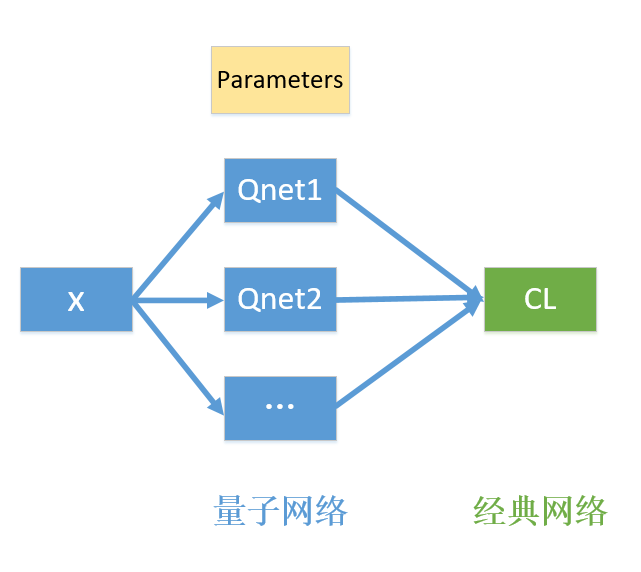

图中所示的Parameters，就是需要优化的参数omega_1, omega_2, omega_3，所有量子网络共享这些参数，以便参与到对$C_L$的求导优化，这是通过下面代码构造的MQMultiGradsLayer类来完成的。

In [4]:
# 根据梯度算子构造神经网络，以便参与到优化
# 由于所有梯度算子共享同一套优化参数omega_1, omega_2, omega_3，我们需要把这些梯度算子封装到一层神经网络中
import mindspore as ms
ms.context.set_context(mode=ms.context.PYNATIVE_MODE, device_target="CPU")

from mindspore import nn
from mindquantum.framework import MQOps
from mindspore.common.initializer import initializer
from mindspore import ops, Tensor, Parameter


class MQMultiGradsLayer(nn.Cell):
    def __init__(self, grads_ops_list, weight='normal'):
        """Initialize a MQLayer object."""
        super().__init__()
        self.evo_list = []
        weight_name_set = set()
        # 相同名称的ansatz为同一个权重
        ansatz_params_list = []

        for grads in grads_ops_list:
            self.evo_list.append(MQOps(grads))
            # print(grads.circ_right)
            weight_name_set = weight_name_set | set(grads.ansatz_params_name)
            ansatz_params_list.append(grads.ansatz_params_name)
        weight_name_list = list(weight_name_set)
        weight_name_list = np.sort(weight_name_list).tolist()

        self.weight_ind_list = []
        for params_name in ansatz_params_list:
            weight_ind = [weight_name_list.index(p_name) for p_name in params_name]
            self.weight_ind_list.append(Tensor(weight_ind, dtype=ms.int32))

        weight_size = len(weight_name_list)
        if isinstance(weight, ms.Tensor):
            if weight.ndim != 1 or weight.shape[0] != weight_size:
                raise ValueError(f"Weight init shape error, required ({weight_size}, ), but get {weight.shape}.")
        self.weight = Parameter(initializer(weight, weight_size, dtype=ms.float32), name='ansatz_weight')

    def construct(self, x):
        result = []
        for evo, weight_ind in zip(self.evo_list, self.weight_ind_list):
            # print(evo.expectation_with_grad.circ_right)
            weight = ops.gather(self.weight, weight_ind, axis=0) # 挑选网络中需要的的参数
            result.append(evo(x, weight))
        return result

# 生成网络并尝试运行，此时我们会得到2x3x3个网络的输出
QuantumNets = MQMultiGradsLayer(grad_ops_list)
result = QuantumNets(Tensor(np.pi*np.array([[1.,0, 0], [0, 0, 1.]])))
print('共%d个网络' % len(result))
print(result)

共18个网络
[Tensor(shape=[2, 1], dtype=Float32, value=
[[-8.28392163e-04],
 [ 1.70038268e-02]]), Tensor(shape=[2, 1], dtype=Float32, value=
[[-5.51035729e-17],
 [-2.74975515e-17]]), Tensor(shape=[2, 1], dtype=Float32, value=
[[ 9.99993265e-01],
 [-1.40857428e-05]]), Tensor(shape=[2, 1], dtype=Float32, value=
[[-1.47796430e-17],
 [-2.82190218e-17]]), Tensor(shape=[2, 1], dtype=Float32, value=
[[ 1.00000000e+00],
 [-1.40858374e-05]]), Tensor(shape=[2, 1], dtype=Float32, value=
[[-1.47796430e-17],
 [-2.82190218e-17]]), Tensor(shape=[2, 1], dtype=Float32, value=
[[ 9.99993265e-01],
 [-1.40857428e-05]]), Tensor(shape=[2, 1], dtype=Float32, value=
[[-1.50369954e-17],
 [-2.83241233e-17]]), Tensor(shape=[2, 1], dtype=Float32, value=
[[-8.28392163e-04],
 [ 1.70038268e-02]]), Tensor(shape=[2, 1], dtype=Float32, value=
[[ 5.50419082e-17],
 [ 1.39000767e-16]]), Tensor(shape=[2, 1], dtype=Float32, value=
[[-8.28386634e-04],
 [ 1.70037132e-02]]), Tensor(shape=[2, 1], dtype=Float32, value=
[[ 5.50419082e

In [5]:
# 构建C_L
class NetworkCL(nn.Cell):
    def __init__(self, n_qubits, grad_ops_list, coeff_list):
        super().__init__()
        self.vqcs = MQMultiGradsLayer(grad_ops_list)
        self.coeff_list = Tensor(coeff_list)
        self.n_qubits = n_qubits
        
    def construct(self):
        x = np.pi*np.eye(n_qubits)
        x = np.row_stack((x, [0]*n_qubits))
        x = Tensor(x)
        qnets = self.vqcs(x)
        # 此时qnets按照u_{ll',j}的实部和虚部依次排布
        real = Tensor(0)
        imag = Tensor(0)
        for n in range(0, len(self.coeff_list)):
            real += qnets[2*n]*self.coeff_list[n]
            imag += qnets[2*n+1]*self.coeff_list[n]
        # 归一化
        norm = ops.pow(ops.square(sum(real[0:n_qubits]))+ops.square(sum(imag[0:n_qubits])), 0.5)
        norm /= ops.pow(ops.square(real[-1])+ops.square(imag[-1]), 0.5)
        return 0.5 - 0.5/n_qubits*norm

CL = NetworkCL(n_qubits, grad_ops_list, coeff_list)
print('初始C_L:', CL())
print('优化参数为:', CL.trainable_params())

初始C_L: [0.38568467]
优化参数为: [Parameter (name=vqcs.weight, shape=(3,), dtype=Float32, requires_grad=True)]


## 优化$C_L$



Text(0, 0.5, 'Cost Function')

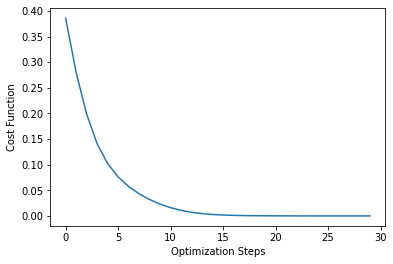

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import mindspore
from mindspore import ops, Tensor, Parameter
from mindspore.nn import TrainOneStepCell

# 优化
learning_rate = 2
optimizer = nn.SGD(CL.trainable_params(), learning_rate=learning_rate)

net = TrainOneStepCell(CL, optimizer)

cost_history = []
for it in range(30):
    res = net()
    cost_history.append(float(res))

plt.plot(np.arange(30), cost_history)
plt.xlabel('Optimization Steps')
plt.ylabel('Cost Function')

## 结果验证

/home/ma-user/anaconda3/envs/MindQuantum/lib/python3.7/site-packages/ipykernel/__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part


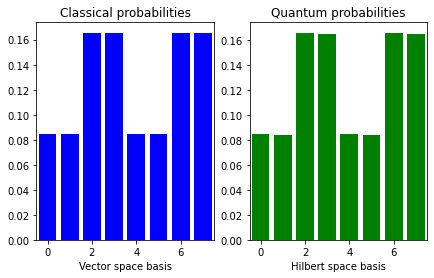

In [7]:
# 得到x并验证结果
from mindquantum.core.gates import I


I_on_all = sum(Circuit(I.on(n)) for n in range(n_qubits))
sim = Simulator('projectq', n_qubits)
sim.apply_circuit(V, CL.trainable_params()[0].asnumpy())
x = sim.get_qs()
sim.reset()
b = sim.apply_circuit(U)
b = sim.get_qs()
A = sum([c*(A_l+I_on_all).matrix(big_end=True) for c, A_l in A_list])
x_classical = np.dot(np.linalg.inv(A.astype(np.float64)), b)
x_classical /= np.linalg.norm(x_classical)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))

ax1.bar(np.arange(0, 2 ** n_qubits), np.abs(x_classical)**2, color="blue")
ax1.set_xlim(-0.5, 2 ** n_qubits - 0.5)
ax1.set_xlabel("Vector space basis")
ax1.set_title("Classical probabilities")

ax2.bar(np.arange(0, 2 ** n_qubits), np.abs(x)**2, color="green")
ax2.set_xlim(-0.5, 2 ** n_qubits - 0.5)
ax2.set_xlabel("Hilbert space basis")
ax2.set_title("Quantum probabilities")

plt.show()

# 原文复现

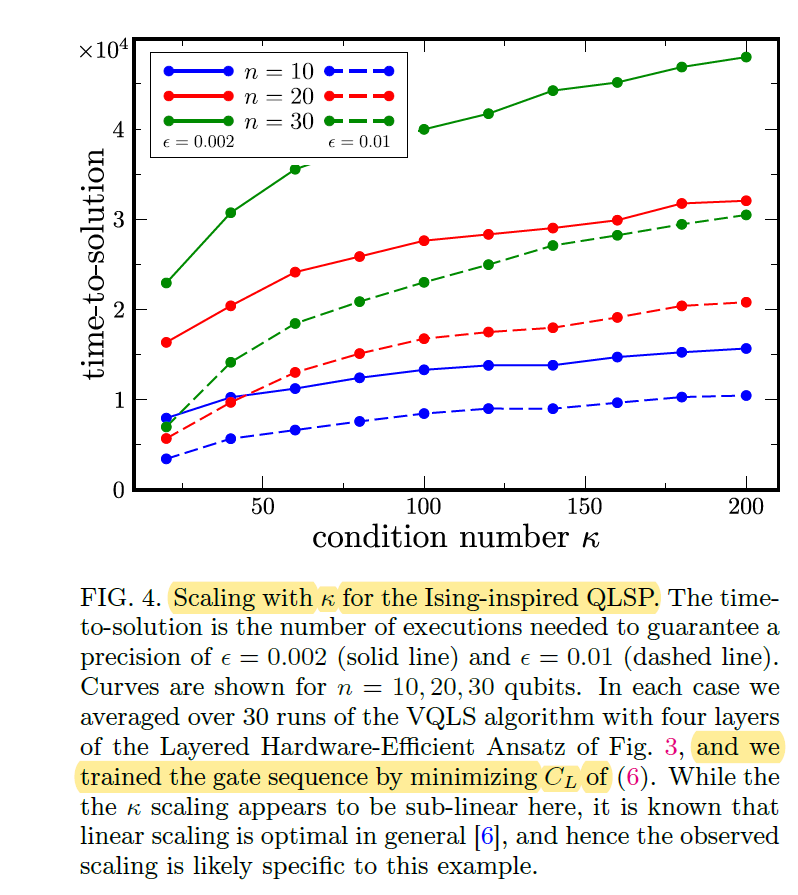
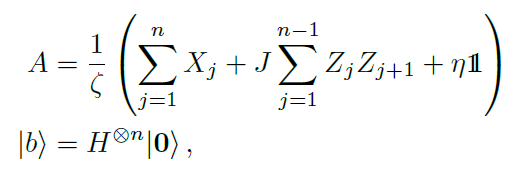

## 构造$A$

原文中要求$J=0.1$，$\xi$和$\eta$的选择应满足让$A$的最大特征值为1，最小特征值为$1/\kappa$，其中$\kappa$是给定的参数。

假设$A$中的前两个求和项的$\sum_{j=1}^nX_j+J\sum_{j=1}^{n-1}Z_jZ_{j+1}$最大最小特征值为$E_{max}, E_{min}$，$\Bbb1$为单位阵，其特征值为1，因此$A$的最大、最小特征值分别为$\frac{E_{max}+\eta}{\xi}=1$，$\frac{E_{min}+\eta}{\xi}=\frac{1}{\kappa}$。

我们首先计算$E_{max}$和$E_{min}$，然后代入上式计算$\xi$和$\eta$。

In [8]:
n_qubits = 10

def generate_A_list(kappa, n_qubits):
    J = 0.1
    I_on_all = sum(Circuit(I.on(n)) for n in range(n_qubits))
    A_list = [[1, Circuit(X.on(j))] for j in range(n_qubits)]
    A_list.extend([[J, Circuit(Z.on(j)) + Z.on(j+1)] for j in range(n_qubits-1)])
    A = sum([c*(A_l+I_on_all).matrix(big_end=True) for c, A_l in A_list])
    eigvals = np.linalg.eigvals(A)
    xi = (max(eigvals)-min(eigvals))/(1-1/kappa)
    eta = (max(eigvals)-kappa*min(eigvals))/(kappa-1)
    A_list.append([eta, Circuit()])
    A_list = [[float(c/xi), A_l] for c, A_l in A_list]
    return A_list

# 求$\kappa=20$时的$A$
kappa = 20
A_list = generate_A_list(kappa, n_qubits)
I_on_all = sum(Circuit(I.on(n)) for n in range(n_qubits))
A = sum([c*(A_l+I_on_all).matrix(big_end=True) for c, A_l in A_list])
eigvals = np.linalg.eigvals(A)
print('最大特征值为%f, 最小特征值为%f' % (max(eigvals), min(eigvals)))

/home/ma-user/anaconda3/envs/MindQuantum/lib/python3.7/site-packages/ipykernel/__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part


最大特征值为1.000000, 最小特征值为0.050000


/home/ma-user/anaconda3/envs/MindQuantum/lib/python3.7/site-packages/ipykernel/__main__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


## 构造$V$

文中使用的是Hardware-Efficient Ansatz。
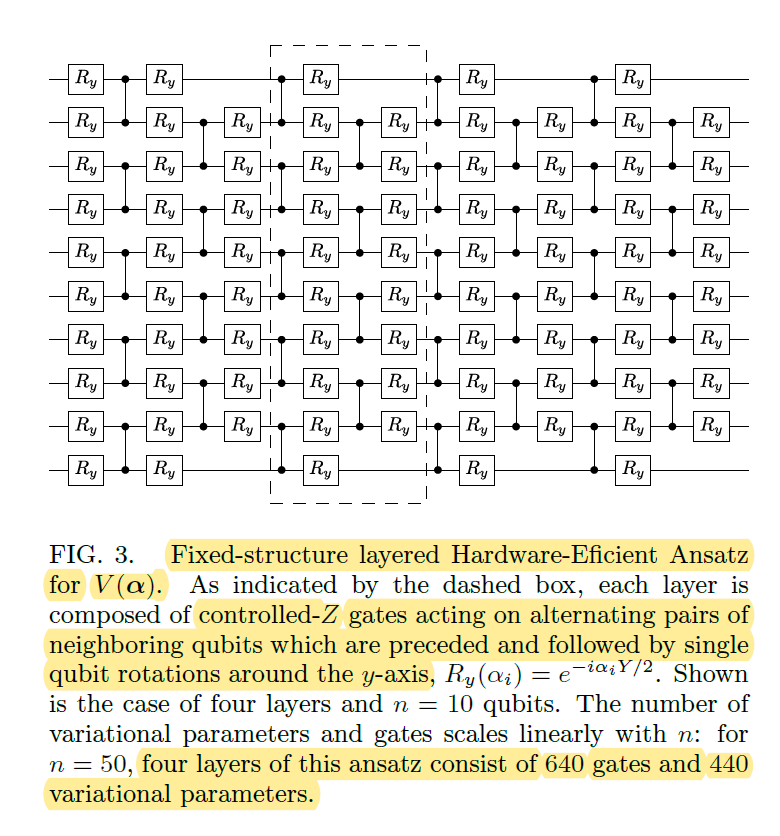

In [9]:
from mindquantum.core.circuit import shift, add_prefix, Circuit
from mindquantum.core.gates import RY, X

n_layers = 4
n_qubits = 10


def construct_ansatz(n_layers, n_qubits):
    ansatz = Circuit()
    ansatz += Circuit(RY(f'0_ry{i}').on(i) for i in range(n_qubits))
    # 构造每一层的线路模板
    template = Circuit([X.on(1, 0)])
    single_layer = sum(shift(template, i) for i in range(0, n_qubits, 2))
    single_layer += Circuit(RY(f'1_ry{i}').on(i) for i in range(n_qubits))
    single_layer += sum(shift(template, i) for i in range(1, n_qubits-1, 2))
    single_layer += Circuit(RY(f'2_ry{i}').on(i) for i in range(1, n_qubits-1))
    # 总共有n_layers层
    ansatz += sum(add_prefix(single_layer, f'layer{i}') for i in range(0, n_layers))

    return ansatz


eff_ansatz = construct_ansatz(n_layers, n_qubits)
print(eff_ansatz)

q0: ──RY(0_ry0)────●────RY(layer0_1_ry0)─────────────────────────────●────RY(layer1_1_ry0)─────────────────────────────●────RY(layer2_1_ry0)─────────────────────────────●────RY(layer3_1_ry0)───────────────────────────
                   │                                                 │                                                 │                                                 │
q1: ──RY(0_ry1)────X────RY(layer0_1_ry1)────●────RY(layer0_2_ry1)────X────RY(layer1_1_ry1)────●────RY(layer1_2_ry1)────X────RY(layer2_1_ry1)────●────RY(layer2_2_ry1)────X────RY(layer3_1_ry1)────●────RY(layer3_2_ry1)──
                                            │                                                 │                                                 │                                                 │
q2: ──RY(0_ry2)────●────RY(layer0_1_ry2)────X────RY(layer0_2_ry2)────●────RY(layer1_1_ry2)────X────RY(layer1_2_ry2)────●────RY(layer2_1_ry2)────X────RY(layer2_2_ry2)────●────RY(layer3_1_ry2)────X──

## 优化终止条件

根据文中式(9)的定义，可以将$\gamma=\frac{\epsilon^2}{n_{qubits}\kappa^2}$作为$C_L$的下界，当$C_L\le\gamma$时终止优化程序，得到问题的解。

Loss:  0.42248088121414185
Loss:  0.21629470586776733
Loss:  0.09381318092346191
Loss:  0.04756203293800354
Loss:  0.03003239631652832
Loss:  0.021059304475784302
Time Cost: 6


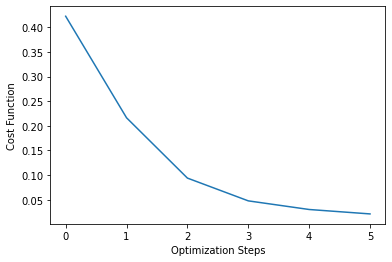

In [10]:
# 构造U
U = UN(H, n_qubits)

# 构造V
eff_ansatz = construct_ansatz(n_layers, n_qubits)

# 构造所有线路
coeff_list, grad_ops_list, circuits_list = generate_grad_ops(n_qubits, eff_ansatz, U, A_list)

# 构造损失函数
CL = NetworkCL(n_qubits, grad_ops_list, coeff_list)

# 优化
learning_rate = 5
epsilon = 10
optimizer = nn.SGD(CL.trainable_params(), learning_rate=learning_rate)

net = TrainOneStepCell(CL, optimizer)

cost_history = []
time_cost = 0
gamma = 1/n_qubits*(epsilon/kappa)**2
res = gamma + 1
while gamma < res:
    res = net()
    cost_history.append(float(res))
    print('Loss: ', float(res))
    time_cost += 1


plt.plot(np.arange(len(cost_history)), cost_history)
plt.xlabel('Optimization Steps')
plt.ylabel('Cost Function')
print('Time Cost:', time_cost)

## Time-to-solution的计算

图四描述了$\kappa$取值与Time-to-solution的关系，文中的Time-to-solution为计算损失函数的次数(the number of exact cost function evaluations during the optimization)。

In [11]:
def time_to_solution(A_list, n_qubits, epsilon):
    n_layers = 4

    U = UN(H, n_qubits)
    eff_ansatz = construct_ansatz(n_layers, n_qubits)
    coeff_list, grad_ops_list, circuits_list = generate_grad_ops(n_qubits, eff_ansatz, U, A_list)
    CL = NetworkCL(n_qubits, grad_ops_list, coeff_list)

    learning_rate = 5
    optimizer = nn.SGD(CL.trainable_params(), learning_rate=learning_rate)

    net = TrainOneStepCell(CL, optimizer)

    time_to_solution = 0
    gamma = 1/n_qubits*(epsilon/kappa)**2
    res = gamma + 1
    while gamma < res:
        res = net()
        time_to_solution += 1
    return time_to_solution

## Fig.4复现

$\kappa$取不同值时，我们以$\kappa=20$为基准，对$A$中每项的系数进行放缩，以满足其最大特征值和最小特征值为$1,1/\kappa$。由于$n_{qubits}>10$时运行时间过长，这里仅复现$n_{qubits}=10$的情况。这里取$\epsilon$为50和10，以让程序更快执行完毕。

In [12]:
epsilon_list = (50, 10)
all_time_cost = []
n_qubits = 10
kappa_list = np.arange(20, 180, 20)
A_list = generate_A_list(kappa_list[0], n_qubits)
for epsilon in epsilon_list:
    time_cost = []
    print('epsilon:', epsilon)
    for kappa in kappa_list:
        # 放缩A_list
        xi = (1-1/kappa_list[0])/(1-1/kappa)
        eta = (1-kappa*1/kappa_list[0])/(kappa-1)
        A_resized = [[float(c/xi), A_l] for c, A_l in A_list]
        A_resized[-1][0] += eta/xi
        time_cost.append(time_to_solution(A_resized, n_qubits, epsilon))
        print('kappa:', kappa, 'Time-to-solution:', time_cost[-1])
        # A = sum([c*(A_l+I_on_all).matrix(big_end=True) for c, A_l in A_resized])
        # eigvals = np.linalg.eigvals(A)
        # print('最大特征值为%f, 最小特征值为%f' % (max(eigvals), min(eigvals)))
    all_time_cost.append(time_cost)
all_time_cost = np.asarray(all_time_cost)

/home/ma-user/anaconda3/envs/MindQuantum/lib/python3.7/site-packages/ipykernel/__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part


epsilon: 50
kappa: 20 Time-to-solution: 1
kappa: 40 Time-to-solution: 3
kappa: 60 Time-to-solution: 4
kappa: 80 Time-to-solution: 5
kappa: 100 Time-to-solution: 6
kappa: 120 Time-to-solution: 7
kappa: 140 Time-to-solution: 8
kappa: 160 Time-to-solution: 9
epsilon: 10
kappa: 20 Time-to-solution: 6
kappa: 40 Time-to-solution: 12
kappa: 60 Time-to-solution: 19
kappa: 80 Time-to-solution: 26
kappa: 100 Time-to-solution: 36
kappa: 120 Time-to-solution: 46
kappa: 140 Time-to-solution: 54
kappa: 160 Time-to-solution: 67


Text(0, 0.5, 'Time-to-solution')

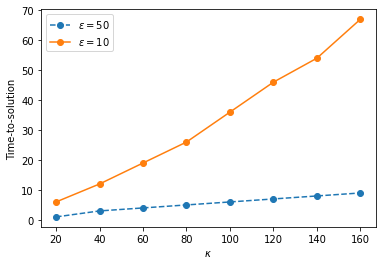

In [13]:
%matplotlib inline

plt.plot(kappa_list, all_time_cost[0, :], 'o--')
plt.plot(kappa_list, all_time_cost[1, :], 'o-')
plt.legend([r'$\epsilon=$'+str(eps) for eps in epsilon_list])
plt.xlabel(r'$\kappa$')
plt.ylabel('Time-to-solution')